In [144]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [145]:
# Read image
image =cv2.imread('CoinsA.png',cv2.IMREAD_COLOR)
#Your Code Here
###

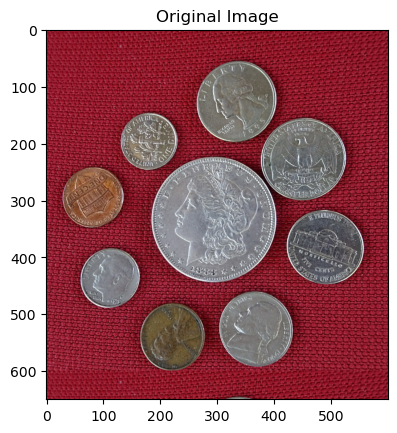

In [146]:
imageCopy = image.copy()
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.show()
# Expected output

# Step 2.1: Convert Image to Grayscale¶

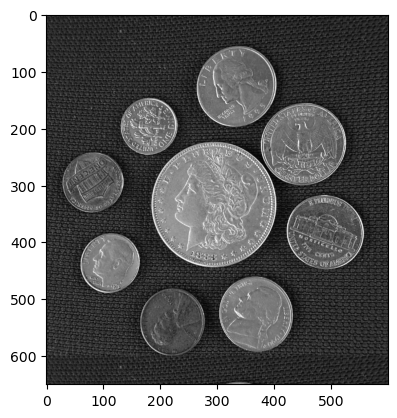

In [147]:
# Convert image to grayscale
###
### YOUR CODE HERE
img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray,cmap='gray')
plt.show()

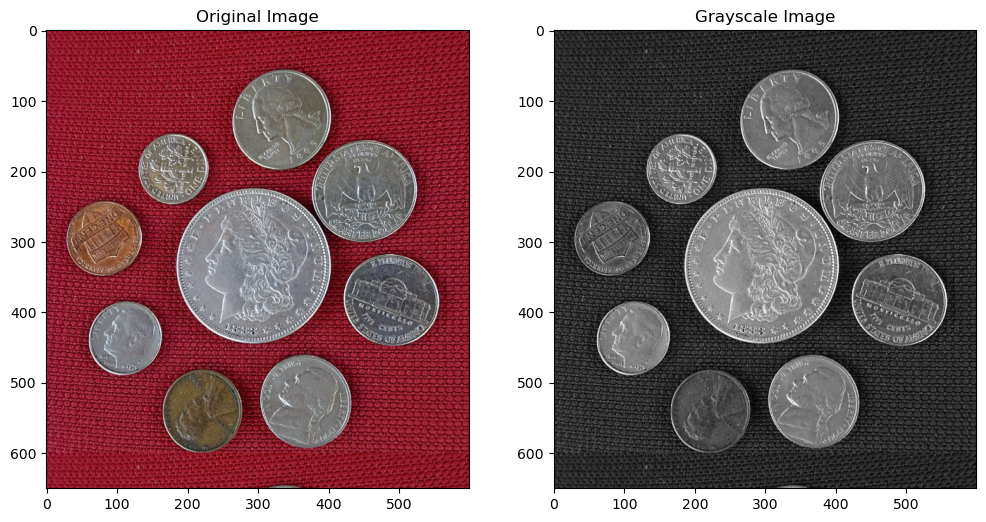

In [148]:
plt.figure(figsize=(12,12))
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(122); plt.imshow(img_gray,cmap='gray');plt.title("Grayscale Image"); plt.show()
# Expected output

# Step 2.2: Split Image into R,G,B Channels

In [149]:
# Split cell into channels
# Store them in variables imageB, imageG, imageR
###
### YOUR CODE HERE
imageB, imageG, imageR = cv2.split(image)

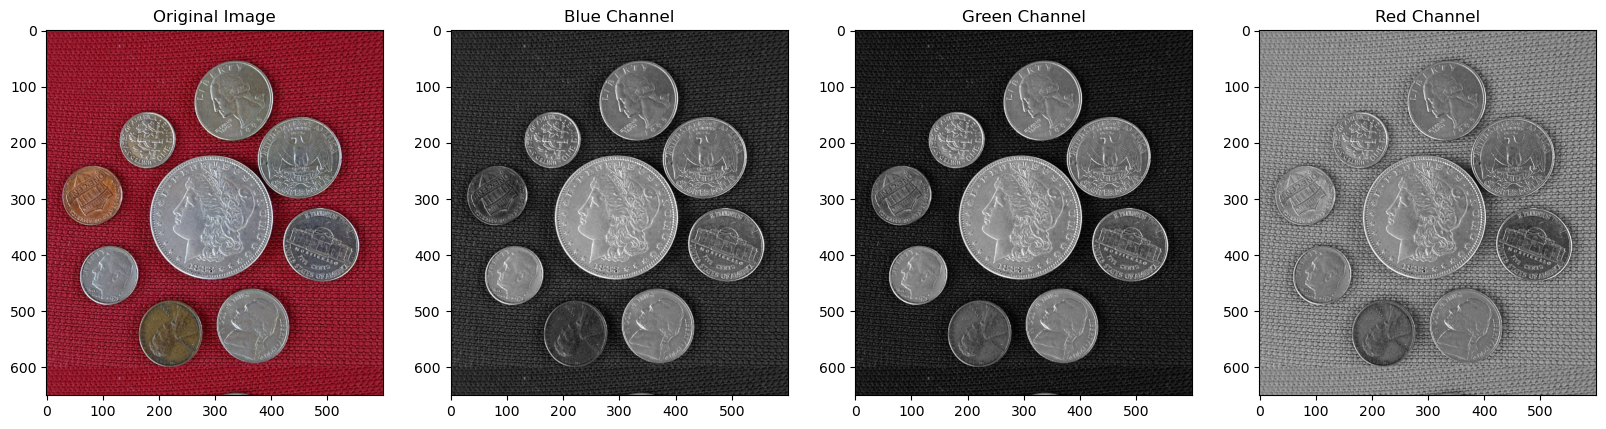

In [150]:
plt.figure(figsize=(20,12))
plt.subplot(141);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(142);plt.imshow(imageB,cmap='gray');plt.title("Blue Channel")
plt.subplot(143);plt.imshow(imageG,cmap='gray');plt.title("Green Channel")
plt.subplot(144);plt.imshow(imageR,cmap='gray');plt.title("Red Channel");
plt.show()
# Expected output

# Step 3.1: Perform Thresholding

In [151]:
###
### YOUR CODE HERE
###

(-0.5, 599.5, 649.5, -0.5)

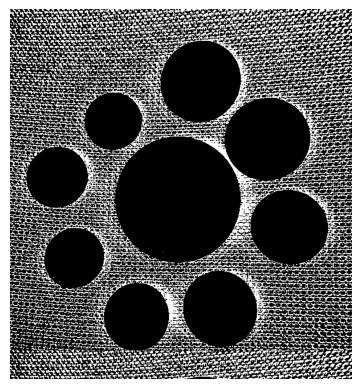

In [152]:
# Display the thresholded image
###
### YOUR CODE HERE
###
# Expected output
thresh=20
maxValue=255
th,dst_bin=cv2.threshold(imageG,thresh,maxValue,cv2.THRESH_BINARY_INV)
plt.plot(2, 2, 3)
plt.imshow(dst_bin, cmap='gray',vmin=0,vmax=255)
plt.axis('off')

# Step 3.2: Perform morphological operations

In [153]:
###
### YOUR CODE HERE
###
kernel=np.ones((4,4),dtype=np.uint8)
imageDilated2=cv2.dilate(dst_bin,kernel,iterations=2)

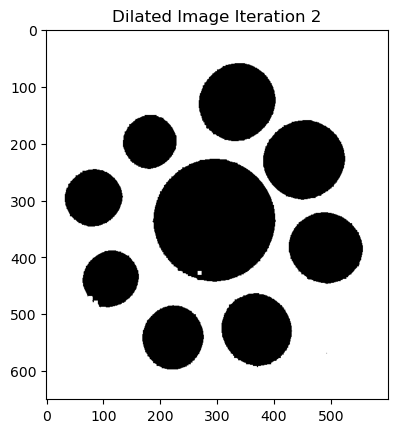

In [154]:
###
### YOUR CODE HERE
###
plt.imshow(imageDilated2,cmap='gray');plt.title('Dilated Image Iteration 2');plt.show()
# Expected output

In [155]:
# Display all the images
# you have obtained in the intermediate steps
###
### YOUR CODE HERE
###


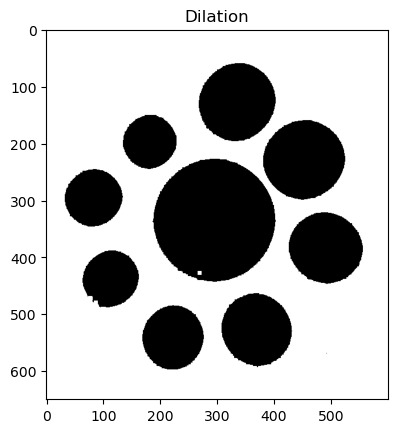

In [156]:
# Get structuring element/kernel which will be used for dilation
###
### YOUR CODE HERE
###
ksize=(5,5)
kernel2=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,ksize)
dilation=cv2.dilate(dst_bin,kernel,iterations=2)
plt.imshow(dilation,cmap='gray');plt.title('Dilation');plt.show()

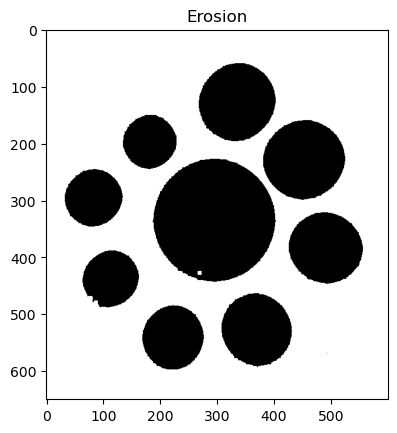

In [166]:
k_size=(11,11)
kernel1=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,k_size)
erosion=cv2.erode(dilation,kernel1)
plt.imshow(dilation,cmap='gray');plt.title('Erosion');plt.show()

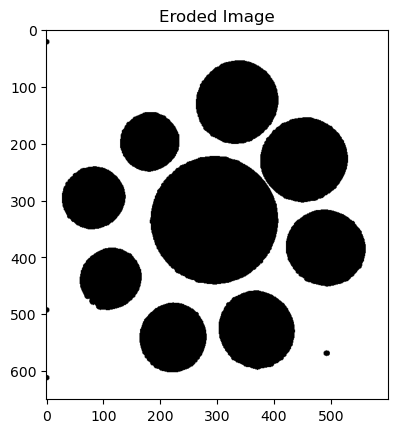

In [167]:
###
### YOUR CODE HERE
###
plt.imshow(erosion,cmap='gray');plt.title("Eroded Image");plt.show()
# Expected output

In [168]:
###
### YOUR CODE HERE
###

# Step 4.1: Create SimpleBlobDetector

In [169]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0

params.minDistBetweenBlobs = 2

# Filter by Area.
params.filterByArea = False

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.8

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.8

# Filter by Inertia
params.filterByInertia =True
params.minInertiaRatio = 0.8

In [170]:
# Create SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)

# Step 4.2: Detect Coins

In [171]:
# Detect blobs
###
### YOUR CODE HERE
###
keypoints = detector.detect(erosion)

In [172]:
# Print number of coins detected
###
### YOUR CODE HERE
###
print(f"Number of coins detected: {len(keypoints)}")

Number of coins detected: 9
